# V252: Aktivierung mit thermischen Neutronen

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2

plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Teil 1: Halbwertszeit von Silber

In [2]:
#Bestimmung des Untergrundes aus Messdaten
ug=np.loadtxt('Messdaten/V252MessdatenUG.dat', usecols=[1])

#Untergrund muss wegen Addition um Faktor vier erhöht werden
ug_mean=np.mean(4*ug)
ug_mean_err=np.std(4*ug)/np.sqrt(len(ug))

print('Für die Untergrundrate ergibt sich:')
print('ug_mean = (' + str(ug_mean) + ' +/- ' + str(ug_mean_err) + ') ' )

Für die Untergrundrate ergibt sich:
ug_mean = (14.3333333333 +/- 1.02627517788) 


#### Bestimmung der Zerfallskonstanten

In [3]:
#Daten aus den vier Zerfallsmessungen

n1=np.loadtxt('Messdaten/V252MessdatenAg1.dat', usecols=[1])
n2=np.loadtxt('Messdaten/V252MessdatenAg2.dat', usecols=[1])
n3=np.loadtxt('Messdaten/V252MessdatenAg3.dat', usecols=[1])
n4=np.loadtxt('Messdaten/V252MessdatenAg4.dat', usecols=[1])

N=n1+n2+n3+n4
N_err=np.sqrt(N)

#Zerfallszeiten
t=np.arange(5,405,10)

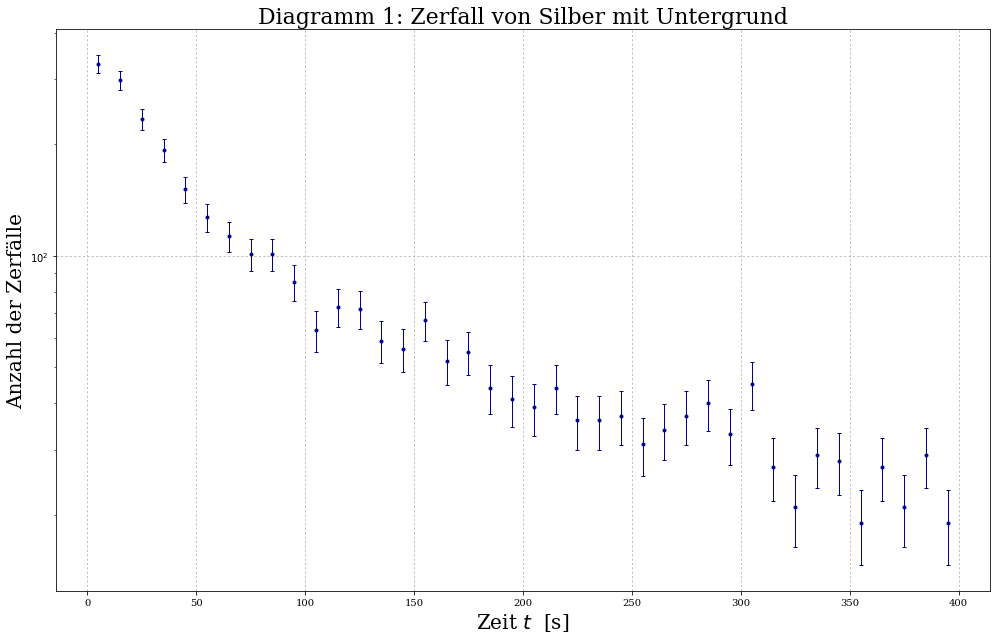

In [4]:
#Plot der Messdaten
plt.errorbar(t, N, yerr=N_err,linewidth=1,linestyle='',marker='.',color='darkblue')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.title(r'Diagramm 1: Zerfall von Silber mit Untergrund', size=22)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm1.pdf', format='PDF')

In [5]:
#Fit der Messdaten
y0=ug_mean

def fit_silver(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1) +A2*np.exp(-x*l2) + y0

#Startparameter
p=[500,0.02,50,0.001]  #Werte an unsere Messung anpassen

popt,pcov=curve_fit(fit_silver,t,N, p0=p, sigma=N_err, maxfev=5000)

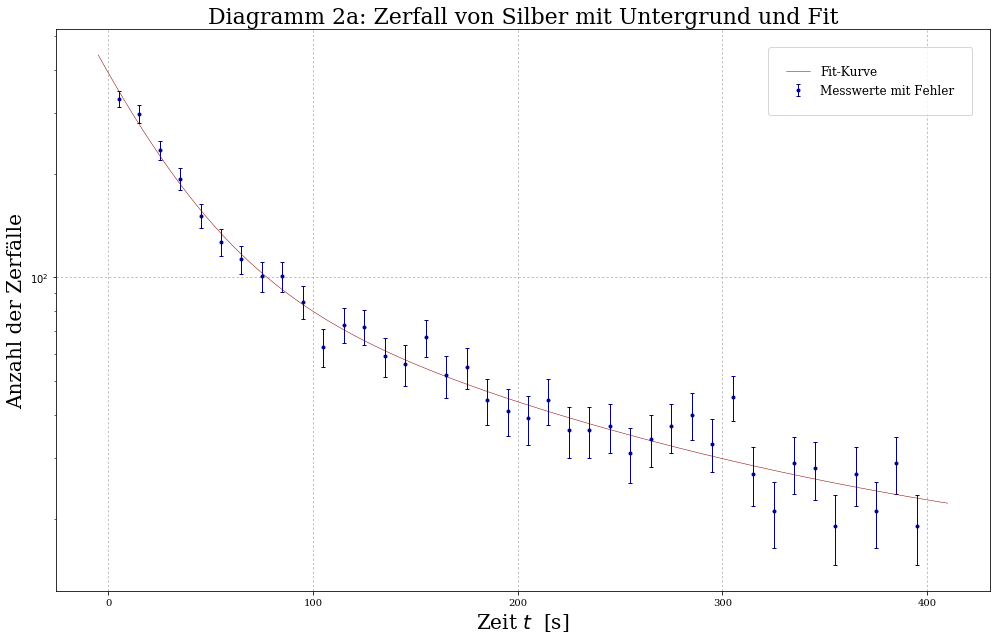

In [6]:
#Plot der Messdaten mit Fit
plt.errorbar(t, N, yerr=N_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-5,410,500),fit_silver(np.linspace(-5,410,500),*popt),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.title(r'Diagramm 2a: Zerfall von Silber mit Untergrund und Fit', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm2a.pdf', format='PDF')

In [7]:
#Ausgabe der Fitparameter
print('Der Fit an unsere Messdaten liefert die folgenden Werte: ')
print('A1 = (' + str(popt[0]) + ' +/- ' + str(np.sqrt(pcov[0,0])) + ')' )
print('l1 = (' + str(popt[1]) + ' +/- ' + str(np.sqrt(pcov[1,1])) + ') 1/s' )
print('A2 = (' + str(popt[2]) + ' +/- ' + str(np.sqrt(pcov[2,2])) + ')' )
print('l2 = (' + str(popt[3]) + ' +/- ' + str(np.sqrt(pcov[3,3])) + ') 1/s' )

Der Fit an unsere Messdaten liefert die folgenden Werte: 
A1 = (277.49103573 +/- 20.1971084579)
l1 = (0.0314513204143 +/- 0.00416981612713) 1/s
A2 = (99.3190265507 +/- 18.465705567)
l2 = (0.00619771595364 +/- 0.000766668150157) 1/s


In [8]:
#Güte des Fits
chi_squared=np.sum((fit_silver(t,*popt)-N)**2/N_err**2)

#Freiheitsgrade
dof=len(N)-4

chi_squared_red=chi_squared/dof

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared))
print('chi_squared_red= ' + str(chi_squared_red))
print()

#Fitwahrscheinlichkeit
prob=round(1-chi2.cdf(chi_squared,dof),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 28.1116405706
chi_squared_red= 0.78087890474

Die Fitwahrscheinlichkeit beträgt: 82.0 %


#### Korrektur des Fits 

In [9]:
# a) Subtraktion des 1-Sigma-Fehlers vom Untergrund
ug_minus=ug_mean-ug_mean_err

def fit_silver_minus(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1) +A2*np.exp(-x*l2) + ug_minus

#Startparameter
p=[500,0.02,50,0.001]  #Werte an unsere Messung anpassen

popt_minus,pcov_minus=curve_fit(fit_silver_minus,t,N, p0=p, sigma=N_err, maxfev=5000)

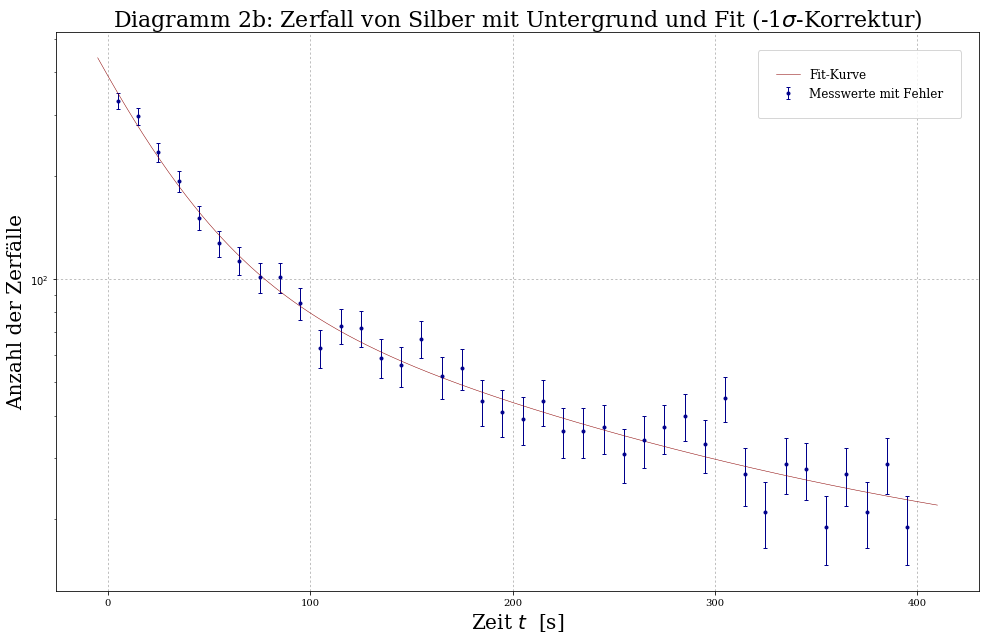

In [10]:
#Plot der Messdaten mit -korrigiertem Fit
plt.errorbar(t, N, yerr=N_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-5,410,500),fit_silver_minus(np.linspace(-5,410,500),*popt_minus),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.title(r'Diagramm 2b: Zerfall von Silber mit Untergrund und Fit (-1$\sigma$-Korrektur)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm2b.pdf', format='PDF')

In [11]:
#Güte des Fits
chi_squared2=np.sum((fit_silver_minus(t,*popt_minus)-N)**2/N_err**2)

#Freiheitsgrade
dof2=len(N)-4

chi_squared_red2=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared_red2))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 27.9751652272
chi_squared_red= 0.777087922977

Die Fitwahrscheinlichkeit beträgt: 83.0 %


In [12]:
#Ausgabe der -korrigierten Fitparameter
print('Die Korrektur des Untergrunds liefert die folgenden Werte: ')
print('A1- = (' + str(popt_minus[0]) + ' +/- ' + str(np.sqrt(pcov_minus[0,0])) + ')' )
print('l1- = (' + str(popt_minus[1]) + ' +/- ' + str(np.sqrt(pcov_minus[1,1])) + ') 1/s' )
print('A2- = (' + str(popt_minus[2]) + ' +/- ' + str(np.sqrt(pcov_minus[2,2])) + ')' )
print('l2- = (' + str(popt_minus[3]) + ' +/- ' + str(np.sqrt(pcov_minus[3,3])) + ') 1/s' )

Die Korrektur des Untergrunds liefert die folgenden Werte: 
A1- = (280.357862392 +/- 19.5583719499)
l1- = (0.0311059135638 +/- 0.00397156449402) 1/s
A2- = (97.1345153145 +/- 17.4091306397)
l2- = (0.00590429866443 +/- 0.000728284636413) 1/s


In [13]:
# b) Addition des 1-Sigma-Fehlers vom Untergrund
ug_plus=ug_mean+ug_mean_err

def fit_silver_plus(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1) +A2*np.exp(-x*l2) + ug_plus

#Startparameter
p=[500,0.02,50,0.001]  #Werte an unsere Messung anpassen

popt_plus,pcov_plus=curve_fit(fit_silver_plus,t,N, p0=p, sigma=N_err, maxfev=5000)

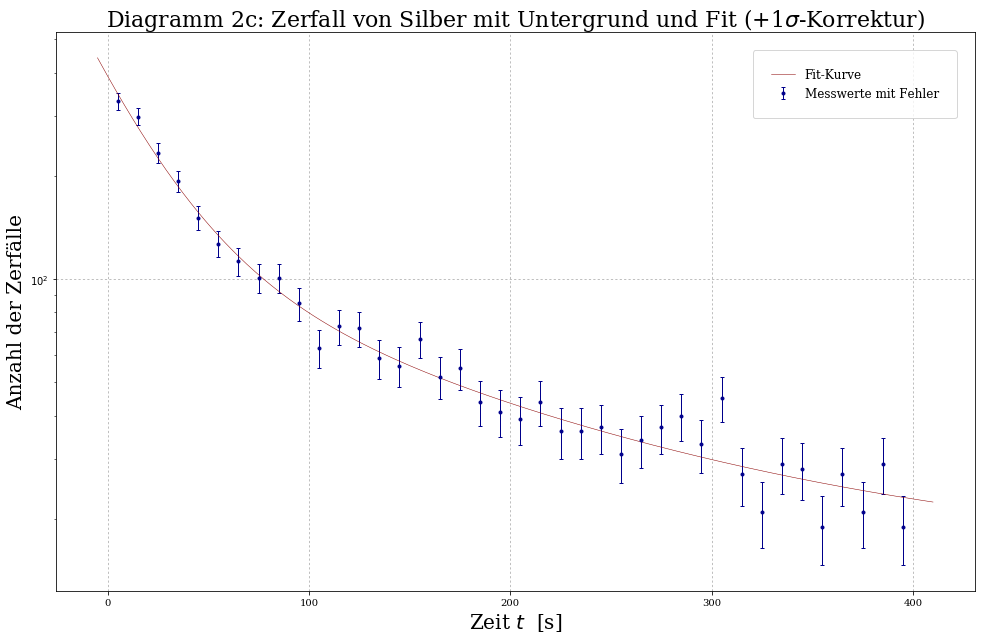

In [14]:
#Plot der Messdaten mit +-korrigiertem Fit
plt.errorbar(t, N, yerr=N_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-5,410,500),fit_silver_plus(np.linspace(-5,410,500),*popt_plus),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.title(r'Diagramm 2c: Zerfall von Silber mit Untergrund und Fit (+1$\sigma$-Korrektur)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm2c.pdf', format='PDF')

In [15]:
#Güte des Fits
chi_squared3=np.sum((fit_silver_plus(t,*popt_plus)-N)**2/N_err**2)

#Freiheitsgrade
dof3=len(N)-4

chi_squared_red3=chi_squared3/dof3

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared3))
print('chi_squared_red= ' + str(chi_squared_red3))
print()

#Fitwahrscheinlichkeit
prob3=round(1-chi2.cdf(chi_squared3,dof3),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob3) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 28.2802499702
chi_squared_red= 0.785562499171

Die Fitwahrscheinlichkeit beträgt: 82.0 %


In [16]:
#Ausgabe der -korrigierten Fitparameter
print('Die Korrektur des Untergrunds liefert die folgenden Werte: ')
print('A1+ = (' + str(popt_plus[0]) + ' +/- ' + str(np.sqrt(pcov_plus[0,0])) + ')' )
print('l1+ = (' + str(popt_plus[1]) + ' +/- ' + str(np.sqrt(pcov_plus[1,1])) + ') 1/s' )
print('A2+ = (' + str(popt_plus[2]) + ' +/- ' + str(np.sqrt(pcov_plus[2,2])) + ')' )
print('l2+ = (' + str(popt_plus[3]) + ' +/- ' + str(np.sqrt(pcov_plus[3,3])) + ') 1/s' )

Die Korrektur des Untergrunds liefert die folgenden Werte: 
A1+ = (274.246268012 +/- 20.9614670684)
l1+ = (0.0318344566751 +/- 0.00440231760797) 1/s
A2+ = (101.88744172 +/- 19.6796376853)
l2+ = (0.00651660530718 +/- 0.000809376350309) 1/s


In [17]:
#Korrektur der Zerfallskonstanten
diff_l1_minus=np.abs(popt[1]-popt_minus[1])
diff_l1_plus=np.abs(popt[1]-popt_plus[1])

diff_l2_minus=np.abs(popt[3]-popt_minus[3])
diff_l2_plus=np.abs(popt[3]-popt_plus[3])

#Daraus folgt der Fehler von l1 und l2:
diff_err_l1=np.mean([diff_l1_minus,diff_l1_plus])
diff_err_l2=np.mean([diff_l2_minus,diff_l2_plus])

l1=popt[1]
l1_err=np.sqrt(diff_err_l1**2+pcov[1,1])

print('Die Zerfallskonstante von 110Ag wurde bestimmt auf:')
print('l1 = (' + str(l1) + ' +/- ' + str(l1_err) + r') 1/s')
print()

l2=popt[3]
l2_err=np.sqrt(diff_err_l2**2+pcov[3,3])

print('Die Zerfallskonstante von 108Ag wurde bestimmt auf:')
print('l2 = (' + str(l2) + ' +/- ' + str(l2_err) + r') 1/s')



Die Zerfallskonstante von 110Ag wurde bestimmt auf:
l1 = (0.0314513204143 +/- 0.00418569711044) 1/s

Die Zerfallskonstante von 108Ag wurde bestimmt auf:
l2 = (0.00619771595364 +/- 0.000825536134071) 1/s


#### Halbwertszeit 

In [18]:
T_halb_110Ag=np.log(2)/l1 
T_halb_110Ag_err=np.log(2)*l1_err/l1**2

print('Die Halbwertszeit für 110Ag wurde bestimmt auf:')
print('T_halb_110Ag = (' + str(T_halb_110Ag) + ' +/- ' + str(T_halb_110Ag_err) + ') s')
print()

T_halb_108Ag=np.log(2)/l2
T_halb_108Ag_err=np.log(2)*l2_err/l2**2

print('Die Halbwertszeit für 108Ag wurde bestimmt auf:')
print('T_halb_108Ag = (' + str(T_halb_108Ag) + ' +/- ' + str(T_halb_108Ag_err) + ') s')

Die Halbwertszeit für 110Ag wurde bestimmt auf:
T_halb_110Ag = (22.0387306933 +/- 2.93302316614) s

Die Halbwertszeit für 108Ag wurde bestimmt auf:
T_halb_108Ag = (111.839133278 +/- 14.8969792122) s


#### Vergleich mit Literaturwert aus Nuklidkarte

In [19]:
#Literaturwerte
T_110Ag_lit=24.6 #s
T_108Ag_lit=2.41*60 #s

#Differenz Messwert und Literatur mit Fehler 
diff_T_110Ag=np.abs(T_110Ag_lit-T_halb_110Ag)
diff_T_108Ag=np.abs(T_108Ag_lit-T_halb_108Ag)

print('Für die Different Messwert-Literatur für 110Ag folgt:')
print('∆T_110Ag = (' +str(diff_T_110Ag) + ' +/- ' + str(T_halb_110Ag_err) + ') s')
print()
print('Für die Different Messwert-Literatur für 108Ag folgt:')
print('∆T_108Ag = (' +str(diff_T_108Ag) + ' +/- ' + str(T_halb_108Ag_err) + ') s')

Für die Different Messwert-Literatur für 110Ag folgt:
∆T_110Ag = (2.56126930667 +/- 2.93302316614) s

Für die Different Messwert-Literatur für 108Ag folgt:
∆T_108Ag = (32.7608667217 +/- 14.8969792122) s


### Teil 2: Halbwertszeit von Indium

In [20]:
#Untergrund analog zum ersten Aufgabenteil

#Messdaten
N2=np.loadtxt('Messdaten/V252MessdatenIn.dat', usecols=[1])
N2_err=np.sqrt(N2)

#Zerfallszeite
t2=np.arange(5,50*60+5,120) #Stimmt das?

#Untergrund
ug_in=12*ug_mean

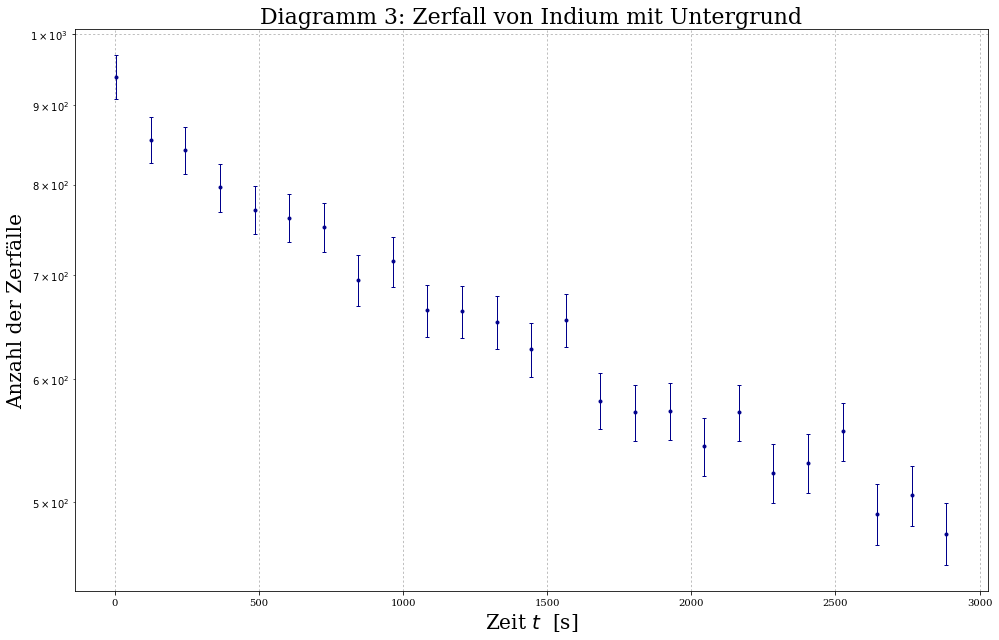

In [21]:
#Plot der Messdaten
plt.errorbar(t2, N2, yerr=N2_err,linewidth=1,linestyle='',marker='.',color='darkblue')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.yticks([1000],[r'$1 \times 10^3$']) #[400,5e2,600,700,800,900,1000], ['400','500','$600$','$700$','$800$','$900$','$1000$'])

plt.title(r'Diagramm 3: Zerfall von Indium mit Untergrund', size=22)
plt.grid(ls='dotted')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm3.pdf', format='PDF')

In [22]:
#Fit der Messdaten mit Expontentialfunktion 
def fit_indium(x,N0,l3):
    return N0*np.exp(-l3*x) + ug_in

p2=[500,0.0004]
popt_in,pcov_in=curve_fit(fit_indium,t2[1:],N2[1:],p0=p2,sigma=N2_err[1:])

Der erste Wert wird im Fit nicht berücksichtigt, weil  am Anfang zusätzlich noch $\beta^{-}$-Strahlung vom metastabilen Isotop $^{116m}In$ n ausgesendet wird, die eine Halbwertszeit von $t_{HW}=14 s$ besitzt und somit den ersten Messwert verfälscht, da nach der ersten $120s$-Messung nur noch etwa $0.26\%$ des $ \beta^{-}$-Strahlers vorhanden ist.

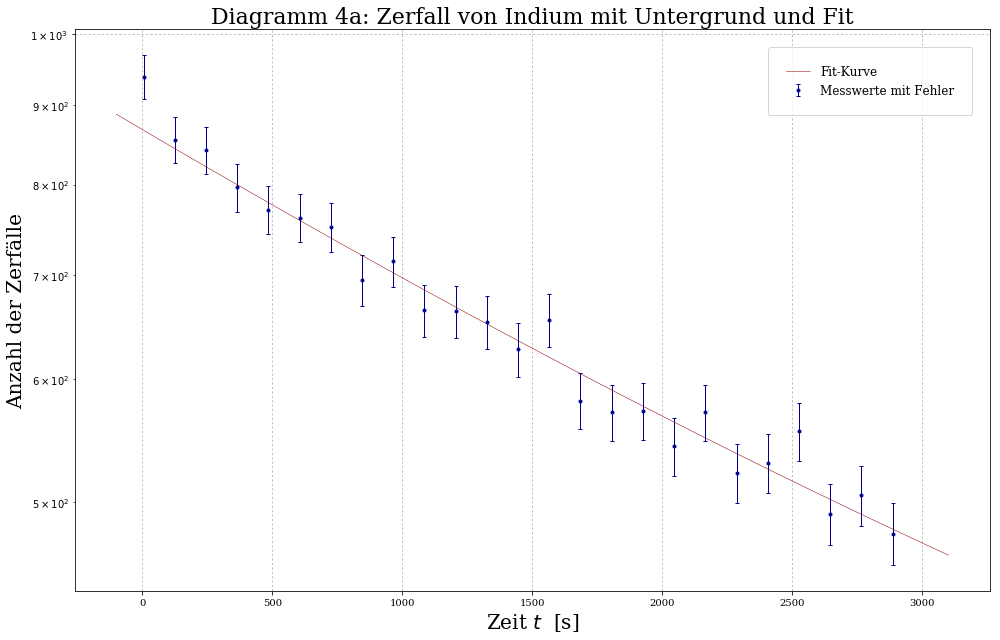

In [23]:
#Plot der Messdaten mit Fit
plt.errorbar(t2, N2, yerr=N2_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-100,3100,500),fit_indium(np.linspace(-100,3100,500),*popt_in),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.yticks([1000],[r'$1 \times 10^3$'])
plt.title(r'Diagramm 4a: Zerfall von Indium mit Untergrund und Fit', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm4a.pdf', format='PDF')

In [24]:
#Ausgabe der Fitparameter
print('Der Fit an unsere Messdaten liefert die folgenden Werte: ')
print('N0 = (' + str(popt_in[0]) + ' +/- ' + str(np.sqrt(pcov_in[0,0])) + ')' )
print('l3 = (' + str(popt_in[1]) + ' +/- ' + str(np.sqrt(pcov_in[1,1])) + ') 1/s' )

Der Fit an unsere Messdaten liefert die folgenden Werte: 
N0 = (696.184016423 +/- 10.6130616388)
l3 = (0.000282421192196 +/- 1.01853878802e-05) 1/s


In [25]:
#Güte des Fits
chi_squared4=np.sum((fit_indium(t2,*popt_in)-N2)**2/N2_err**2)

#Freiheitsgrade
dof4=len(N2)-2

chi_squared_red4=chi_squared4/dof4

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared4))
print('chi_squared_red= ' + str(chi_squared_red4))
print()

#Fitwahrscheinlichkeit
prob4=round(1-chi2.cdf(chi_squared4,dof4),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob4) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 17.6615064801
chi_squared_red= 0.767891586092

Die Fitwahrscheinlichkeit beträgt: 78.0 %


#### Korrektur des Fits

In [26]:
# a) Subtraktion des 1-Sigma-Fehlers vom Untergrund
ug_in_minus=ug_in-(12*ug_mean_err)

def fit_indium_minus(x,N0,l3):
    return N0*np.exp(-l3*x) + ug_in_minus

popt_in_minus,pcov_in_minus=curve_fit(fit_indium_minus,t2[1:],N2[1:],p0=p2,sigma=N2_err[1:])


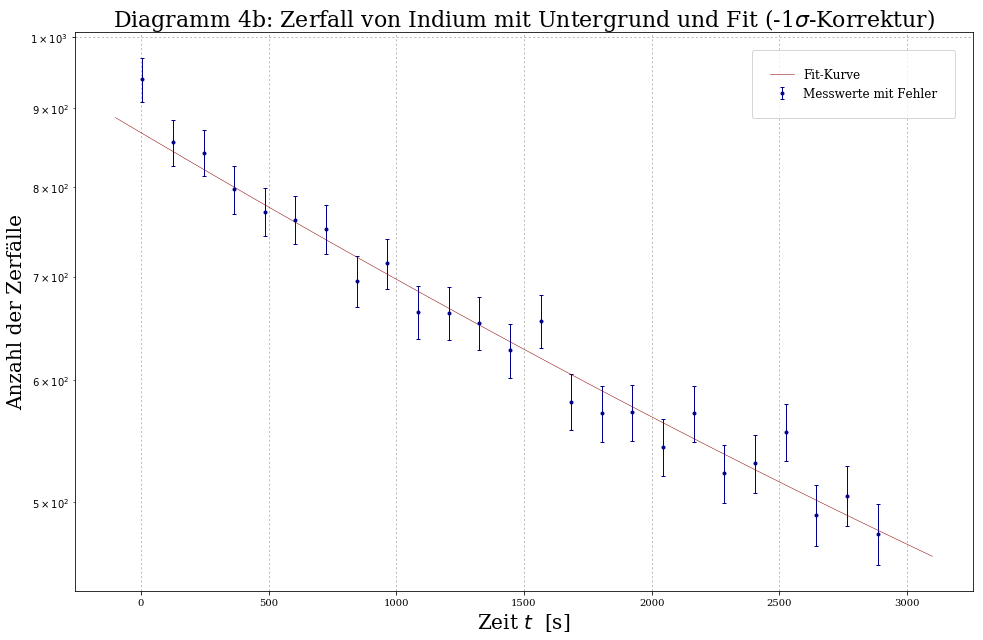

In [27]:
#Plot der Messdaten mit -korrigiertem Fit
plt.errorbar(t2, N2, yerr=N2_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-100,3100,500),fit_indium_minus(np.linspace(-100,3100,500),*popt_in_minus),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.yticks([1000],[r'$1 \times 10^3$'])
plt.title(r'Diagramm 4b: Zerfall von Indium mit Untergrund und Fit (-1$\sigma$-Korrektur)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm4b.pdf', format='PDF')

In [28]:
#Güte des Fits
chi_squared5=np.sum((fit_indium_minus(t2,*popt_in_minus)-N2)**2/N2_err**2)

#Freiheitsgrade
dof5=len(N2)-2

chi_squared_red5=chi_squared5/dof5

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared5))
print('chi_squared_red= ' + str(chi_squared_red5))
print()

#Fitwahrscheinlichkeit
prob5=round(1-chi2.cdf(chi_squared5,dof5),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob5) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 17.91708612
chi_squared_red= 0.779003744349

Die Fitwahrscheinlichkeit beträgt: 76.0 %


In [29]:
#Ausgabe der -korrigierten Fitparameter
print('Die Korrektur des Untergrunds liefert die folgenden Werte: ')
print('N0- = (' + str(popt_in_minus[0]) + ' +/- ' + str(np.sqrt(pcov_in_minus[0,0])) + ')' )
print('l3- = (' + str(popt_in_minus[1]) + ' +/- ' + str(np.sqrt(pcov_in_minus[1,1])) + ') 1/s' )

Die Korrektur des Untergrunds liefert die folgenden Werte: 
N0- = (707.563809304 +/- 10.603966613)
l3- = (0.000274990676672 +/- 9.95290009536e-06) 1/s


In [30]:
# a) Addition des 1-Sigma-Fehlers vom Untergrund
ug_in_plus=ug_in+(12*ug_mean_err)

def fit_indium_plus(x,N0,l3):
    return N0*np.exp(-l3*x) + ug_in_plus

popt_in_plus,pcov_in_plus=curve_fit(fit_indium_plus,t2[1:],N2[1:],p0=p2,sigma=N2_err[1:])

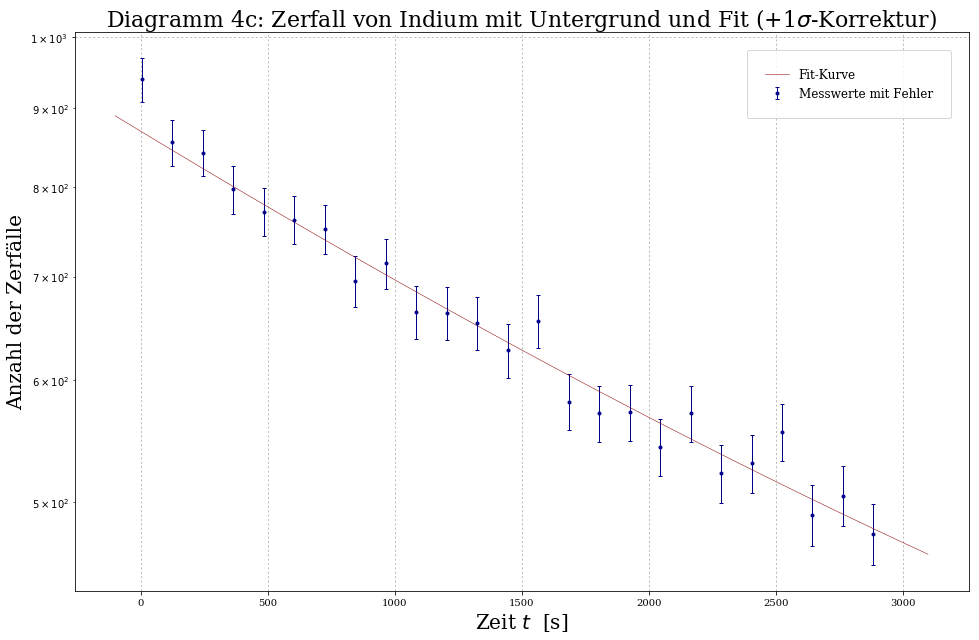

In [31]:
#Plot der Messdaten mit +korrigiertem Fit
plt.errorbar(t2, N2, yerr=N2_err,linewidth=1,linestyle='',marker='.',color='darkblue', label='Messwerte mit Fehler')
plt.plot(np.linspace(-100,3100,500),fit_indium_plus(np.linspace(-100,3100,500),*popt_in_plus),linewidth=0.5,color='darkred',label='Fit-Kurve')
plt.xlabel(r'Zeit $ t$  [s]', size=20)
plt.ylabel(r'Anzahl der Zerfälle', size=20)
plt.yscale('log')
plt.yticks([1000],[r'$1 \times 10^3$'])
plt.title(r'Diagramm 4c: Zerfall von Indium mit Untergrund und Fit (+1$\sigma$-Korrektur)', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V252Diagramm4c.pdf', format='PDF')

In [32]:
#Güte des Fits
chi_squared6=np.sum((fit_indium_plus(t2,*popt_in_plus)-N2)**2/N2_err**2)

#Freiheitsgrade
dof6=len(N2)-2

chi_squared_red6=chi_squared6/dof6

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared6))
print('chi_squared_red= ' + str(chi_squared_red6))
print()

#Fitwahrscheinlichkeit
prob6=round(1-chi2.cdf(chi_squared6,dof6),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob6) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 17.4012526496
chi_squared_red= 0.756576202157

Die Fitwahrscheinlichkeit beträgt: 79.0 %


In [33]:
#Ausgabe der +korrigierten Fitparameter
print('Die Korrektur des Untergrunds liefert die folgenden Werte: ')
print('N0+ = (' + str(popt_in_plus[0]) + ' +/- ' + str(np.sqrt(pcov_in_plus[0,0])) + ')' )
print('l3+ = (' + str(popt_in_plus[1]) + ' +/- ' + str(np.sqrt(pcov_in_plus[1,1])) + ') 1/s' )

Die Korrektur des Untergrunds liefert die folgenden Werte: 
N0+ = (684.852646277 +/- 10.6249956309)
l3+ = (0.000290259556969 +/- 1.04319123388e-05) 1/s


In [34]:
#Korrektur der Zerfallskonstanten
diff_l3_minus=np.abs(popt_in[1]-popt_in_minus[1])
diff_l3_plus=np.abs(popt_in[1]-popt_in_plus[1])

#Daraus folgt der Fehler von l3:
diff_err_l3=np.mean([diff_l3_minus,diff_l3_plus])

l3=popt_in[1]
l3_err=np.sqrt(diff_err_l3**2+pcov_in[1,1])

print('Die Zerfallskonstante von 116In wurde bestimmt auf:')
print('l3 = (' + str(l3) + ' +/- ' + str(l3_err) + r') 1/s')

Die Zerfallskonstante von 116In wurde bestimmt auf:
l3 = (0.000282421192196 +/- 1.27289749255e-05) 1/s


#### Halbwertszeit

In [35]:
T_halb_116In=np.log(2)/l3 
T_halb_116In_err=np.log(2)*l3_err/l3**2

print('Die Halbwertszeit für 116In wurde bestimmt auf:')
print('T_halb_116In = (' + str(T_halb_116In) + ' +/- ' + str(T_halb_116In_err) + ') s')

Die Halbwertszeit für 116In wurde bestimmt auf:
T_halb_116In = (2454.30300456 +/- 110.617624555) s


#### Vergleich mit Literaturwert aus Nuklidkarte

In [37]:
#Literaturwert
T_116In_lit=54*60 #s

#Differenz Messwert und Literatur mit Fehler 
diff_T_116In=np.abs(T_116In_lit-T_halb_116In)

print('Für die Different Messwert-Literatur für 116In folgt:')
print('∆T_110Ag = (' +str(diff_T_116In) + ' +/- ' + str(T_halb_116In_err) + ') s')

Für die Different Messwert-Literatur für 116In folgt:
∆T_110Ag = (785.696995435 +/- 110.617624555) s
